In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = plt.imread('image.jpg')

In [3]:
img.shape

(286, 230)

In [4]:
img

array([[59, 60, 62, ..., 62, 60, 48],
       [61, 62, 64, ..., 61, 56, 47],
       [61, 63, 64, ..., 56, 51, 47],
       ...,
       [45, 48, 43, ..., 37, 50, 34],
       [36, 50, 44, ..., 29, 40, 22],
       [29, 48, 43, ..., 19, 50, 45]], dtype=uint8)

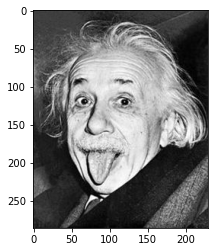

In [5]:
plt.imshow(img, cmap='gray')
plt.show()

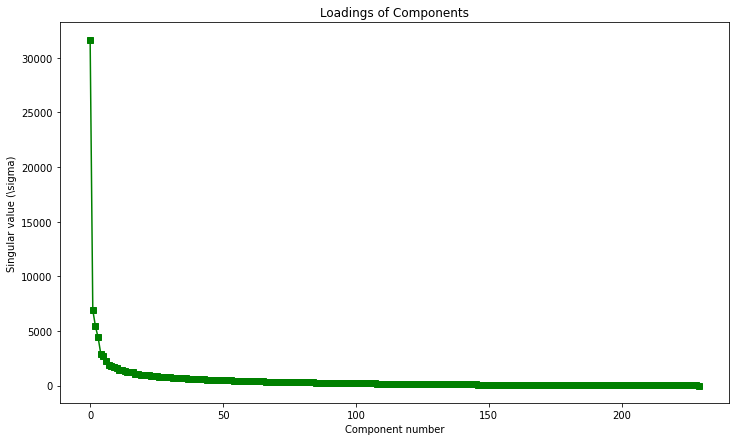

In [8]:
# SVD (singular value decomposition)
U, S, V = np.linalg.svd(img)

# plot the loadings of components
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(S, "gs-")
ax.set_title("Loadings of Components")
ax.set_xlabel('Component number')
ax.set_ylabel('Singular value (\sigma)')
plt.savefig("./images/components.png", dpi=500)

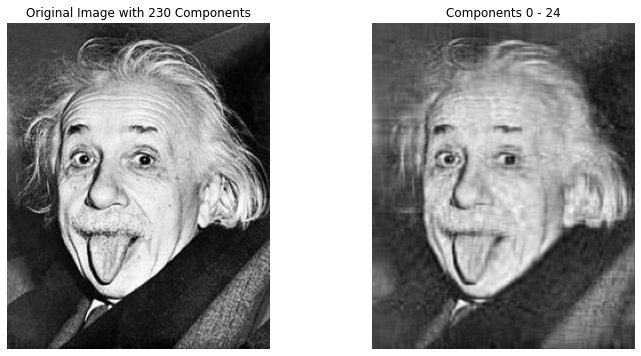

In [10]:
# reconstruct the image based on some components
comps = np.arange(0,25)

# reconstruct the low-rank version of the picture
reconPic = U[:,comps]@np.diag(S[comps])@V[comps,:]

# show the original and reconstructed pictures for comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(f'Original Image with {len(S)} Components')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconPic,cmap='gray')
plt.title(f'Components {comps[0]} - {comps[-1]}')
plt.axis('off')

plt.savefig("./images/originalvs25.png", dpi=300)

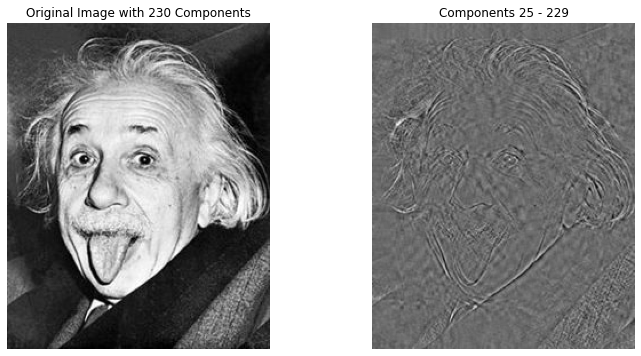

In [11]:
# reconstruct the image based on some components
comps = np.arange(25,len(S))

# reconstruct the low-rank version of the picture
reconPic = U[:,comps]@np.diag(S[comps])@V[comps,:]

# show the original and reconstructed pictures for comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(f'Original Image with {len(S)} Components')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconPic,cmap='gray')
plt.title(f'Components {comps[0]} - {comps[-1]}')
plt.axis('off')

plt.savefig("./images/originalvsremaining.png", dpi=500)

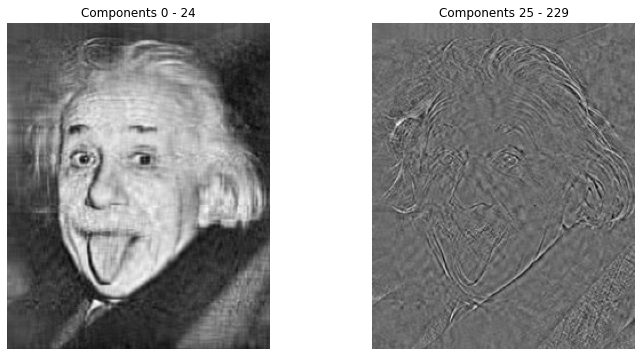

In [12]:
comps = np.arange(0,25)
comps2 = np.arange(25,len(S))

reconPic1 = U[:,comps]@np.diag(S[comps])@V[comps,:]
reconPic2 = U[:,comps2]@np.diag(S[comps2])@V[comps2,:]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(reconPic1,cmap='gray')
plt.title(f'Components {comps[0]} - {comps[-1]}')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconPic2,cmap='gray')
plt.title(f'Components {comps2[0]} - {comps2[-1]}')
plt.axis('off')

plt.savefig("./images/first25vsremaining.png", dpi=500)